In [36]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/KnightChaser/ML-challenge/main/EX_challenging_problems/03_power_consumption_prediction/TetuanCityPowerConsumption.csv")
print(df)

       Temperature  Humidity  Wind Speed  general diffuse flows  \
0            6.559      73.8       0.083                  0.051   
1            6.414      74.5       0.083                  0.070   
2            6.313      74.5       0.080                  0.062   
3            6.121      75.0       0.083                  0.091   
4            5.921      75.7       0.081                  0.048   
...            ...       ...         ...                    ...   
52411        7.010      72.4       0.080                  0.040   
52412        6.947      72.6       0.082                  0.051   
52413        6.900      72.8       0.086                  0.084   
52414        6.758      73.0       0.080                  0.066   
52415        6.580      74.1       0.081                  0.062   

       diffuse flows  Zone 1 Power Consumption  
0              0.119               34055.69620  
1              0.085               29814.68354  
2              0.100               29128.10127  

In [37]:
df.isna().sum()

Temperature                 0
Humidity                    0
Wind Speed                  0
general diffuse flows       0
diffuse flows               0
Zone 1 Power Consumption    0
dtype: int64

In [38]:
df.tail()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
52411,7.010,72.4,0.080,0.040,0.096,31160.45627
52412,6.947,72.6,0.082,0.051,0.093,30430.41825
52413,6.900,72.8,0.086,0.084,0.074,29590.87452
52414,6.758,73.0,0.080,0.066,0.089,28958.17490
52415,6.580,74.1,0.081,0.062,0.111,28349.80989


In [39]:
train_dataset = df.sample(frac = 0.75)
test_dataset  = df.drop(train_dataset.index)

train_target = train_dataset.pop("Zone 1 Power Consumption")
test_target  = test_dataset.pop("Zone 1 Power Consumption")

In [40]:
print(train_dataset.shape)
print(test_dataset.shape)

(39312, 5)
(13104, 5)


In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_dataset)
train_scaled = ss.transform(train_dataset)
test_scaled  = ss.transform(test_dataset)

In [42]:
print(train_scaled.shape)
print(train_target.shape)

(39312, 5)
(39312,)


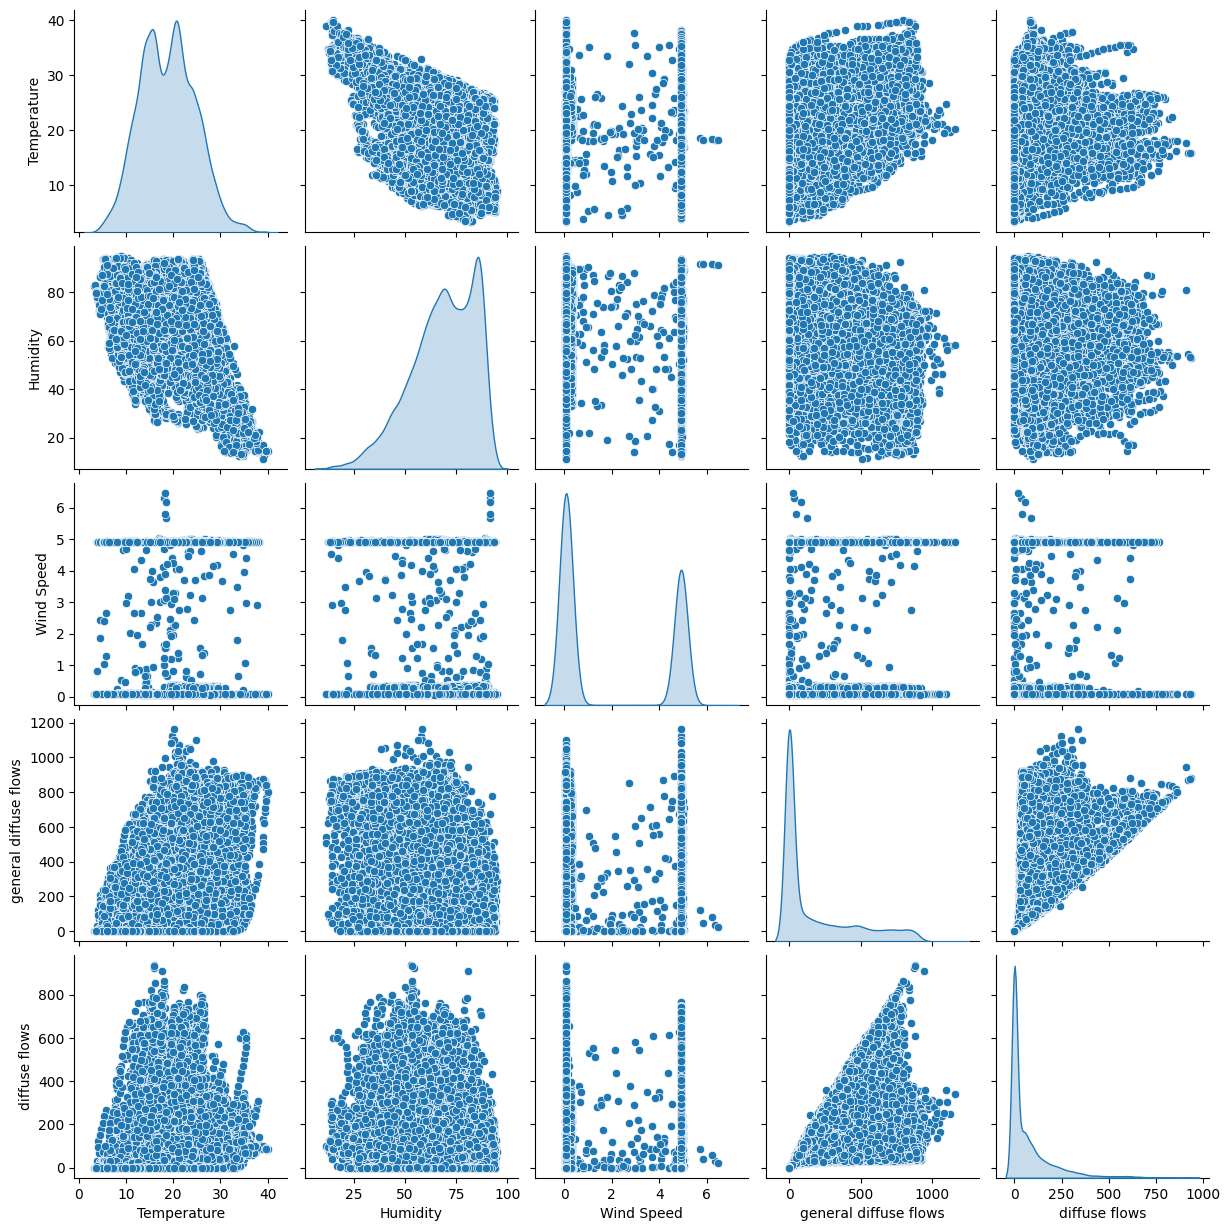

In [43]:
import seaborn as sns
sns.pairplot(train_dataset[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]], diag_kind="kde")

In [44]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Temperature,39312.0,18.800307,5.830469,3.247,14.4100,18.7500,22.870,40.010
Humidity,39312.0,68.299947,15.536242,11.340,58.3475,69.9100,81.400,94.800
Wind Speed,39312.0,1.958921,2.348789,0.050,0.0780,0.0860,4.915,6.483
general diffuse flows,39312.0,182.519023,264.892772,0.004,0.0620,4.6080,317.600,1163.000
diffuse flows,39312.0,74.821809,124.110424,0.019,0.1220,4.0725,100.600,936.000


In [45]:
from tensorflow import keras
import tensorflow as tf

def build_model():
  model = keras.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=[len(train_dataset.keys())]),
    keras.layers.Dense(units = 512, activation = "relu"),
    keras.layers.Dense(units = 128, activation = "relu"),
    keras.layers.Dense(units = 64, activation = "relu"),
    keras.layers.Dense(units = 32, activation = "relu"),
    keras.layers.Dense(units = 16, activation = "relu"),
    keras.layers.Dropout(0.3)
  ])

  optimizer = tf.keras.optimizers.RMSprop()

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [46]:
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1024)              6144      
                                                                 
 dense_22 (Dense)            (None, 512)               524800    
                                                                 
 dense_23 (Dense)            (None, 128)               65664     
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)               

In [47]:
example_batch = train_scaled[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 93ms/step


array([[0.        , 0.02166225, 0.01556563, 0.        , 0.00576958,
        0.        , 0.02708874, 0.        , 0.02595259, 0.        ,
        0.01360726, 0.        , 0.04703293, 0.        , 0.        ,
        0.00985267],
       [0.00896967, 0.00182973, 0.0334477 , 0.        , 0.01253688,
        0.        , 0.01014833, 0.        , 0.01986767, 0.        ,
        0.        , 0.        , 0.01686467, 0.        , 0.        ,
        0.01268842],
       [0.02745317, 0.00119046, 0.03099509, 0.0059644 , 0.00662643,
        0.        , 0.016724  , 0.01065101, 0.01209072, 0.        ,
        0.01234238, 0.        , 0.01871609, 0.        , 0.        ,
        0.0174242 ],
       [0.00365693, 0.00199679, 0.02076295, 0.00845707, 0.        ,
        0.        , 0.00457124, 0.00147971, 0.00578598, 0.        ,
        0.00778764, 0.        , 0.        , 0.        , 0.        ,
        0.01271506],
       [0.02028843, 0.00778566, 0.01336491, 0.        , 0.01239199,
        0.        , 0.00185685, 

In [48]:
from sklearn.utils import validation
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

history = model.fit(
  train_scaled, train_target,
  epochs=1000,steps_per_epoch = 200,
  validation_data = (test_scaled, test_target)
  , verbose=0, callbacks=[PrintDot()])


....

KeyboardInterrupt: ignored

In [49]:
from sklearn.utils import validation

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

history = model.fit(train_scaled, train_target, epochs=1000,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


...

KeyboardInterrupt: ignored

In [50]:
from tensorflow import keras

def create_DNN_model(additional_layers = None):

    model = keras.Sequential()

    if additional_layers:
        for more_layer in additional_layers:
            model.add(more_layer)

    model.add(keras.layers.Dense(units = 1))

    return model


In [51]:

model = create_DNN_model([keras.layers.Dense(units = 1024, activation = "relu", input_shape = (5, )),
                          keras.layers.Dense(units = 512, activation = "relu"),
                          keras.layers.Dropout(0.3),
                          keras.layers.Dense(units = 128, activation = "relu"),
                          keras.layers.Dense(units = 64, activation = "relu"),
                          keras.layers.Dense(units = 32, activation = "relu"),
                          keras.layers.Dense(units = 16, activation = "relu"),
                         ])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 1024)              6144      
                                                                 
 dense_34 (Dense)            (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_35 (Dense)            (None, 128)               65664     
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 16)               

In [52]:
from tensorflow._api.v2.config import optimizer

model.compile(loss = "mse", metrics = "mae", optimizer = "adam")

In [ ]:
from sklearn.utils import validation

early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience = 20, restore_best_weights = True, mode = "auto")

history = model.fit(train_scaled, train_target,
                    epochs = 1000,
                    steps_per_epoch = 200,
                    validation_data = (test_scaled, test_target),
                    callbacks = [early_stopping_checkpoint])


Epoch 1/1000
200/200 [==============================] - ETA: 0s - loss: 332050816.0000 - mae: 13704.9766

In [ ]:
model.evaluate(test_scaled, test_target)

In [ ]:
import matplotlib.pyplot as plt

test_predictions = model.predict(test_scaled).flatten()

plt.scatter(test_target, test_predictions)
plt.xlabel('True Values [Zone 1 Power Consumption]')
plt.ylabel('Predictions [Zone 1 Power Consumption]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
history = pd.DataFrame(history.history)
history['epoch'] = history.epoch
history.tail()